* 출처 : https://www.kaggle.com/vernon360961/rfm-cohort-analysis-and-customer-segmentation
* 데이터셋 : https://archive.ics.uci.edu/ml/datasets/Online+Retail#

In this day and age, the field of Marketing is constantly changing. This is the age of data, the use of sophisticated models,multivariate
statistics and well thought out digital marketing strategies is habitual. With the dawn of the data era, it’s almost evident tha t institutions
update their curriculum to what meets the current requirements of the market.
As daunting as this may seem for someone new to the field, the
blend of Data Science and Marketing has been known to
provide insights that can help businesses refine their strategies
leading to more calculated decision making and improved ROI.
Marketing Science has already made huge leaps and bounds in
existing methodologies, some of which include:
1.   Customer Lifetime Value Analysis
1.   Market Segmentation
1.   Recency, Frequency, Monetary models
1.   A/B Testing
1.   Customer Churn Prediction
1.   Cohort Analysis
And that’s just the tip of the iceberg.


오늘날, 마케팅 분야는 끊임없이 변화하고 있습니다. 이것은 데이터의 시대, 정교한 모델의 사용, 다변량
통계와 잘 생각 된 디지털 마케팅 전략은 습관적입니다. 데이터 시대가 시작되면서 거의 모든 기관이
커리큘럼을 시장의 현재 요구 사항을 충족하는 것으로 업데이트합니다.
이 분야에 새로운 사람을 위해이 것처럼 보일 수도 있지만,
데이터 과학과 마케팅의 조화는
비즈니스 전략 개선에 도움이되는 통찰력 제공
보다 계산 된 의사 결정과 향상된 ROI로 이어집니다.
마케팅 과학은 이미 큰 도약과 한계를 뛰어 넘었습니다.
기존 방법론 중 일부는 다음과 같습니다.
1. LTV : 고객 평생 가치 분석
1. 시장 세분화
1. 최근 성, 빈도, 통화 모델
1. A / B 테스트
1. Churn : 고객 이탈 예측
1. 코호트 분석
빙산의 일각에 불과합니다.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
# df = pd.read_excel("http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx")
df = pd.read_excel('data/Online Retail.xlsx')
df.shape

(541909, 8)

Having a clear idea and workflow is crucial. With the current state of data collection, you’re constantly being exposed to data in large volume and in very short intervals. Not having the right resources to deal with this data can set you back exponentially. 

The use of machine learning and statistical modelling has helped businesses take advantage of this abundance of data. Whether it’s segmenting customers using clustering or predicting customer churn using logistic regression and decision trees, the possibilities are endless. Of course the use of any advanced modelling can sound quite interesting in a presentation or meeting but the entire process comes to a stand until after the data has been prepared and analyzed appropriately, certain decisions require domain knowledge and the right temperament.

Let's take a look at the dataset and do a little Exploratory Data Analysis before we dive deeper.

명확한 아이디어와 워크 플로우를 갖는 것이 중요합니다. 현재 데이터 수집 상태에서는 대량의 데이터와 매우 짧은 간격으로 데이터에 지속적으로 노출됩니다. 이 데이터를 처리 할 적절한 리소스가 없으면 기하 급수적으로 되돌릴 수 있습니다.

머신 러닝 및 통계 모델링을 사용하여 기업은 이러한 풍부한 데이터를 활용할 수있었습니다. 클러스터링을 사용하여 고객을 분류하든 로지스틱 회귀 및 의사 결정 트리를 사용하여 고객 이탈을 예측하든 그 가능성은 무한합니다. 물론 고급 모델링의 사용은 프리젠 테이션이나 회의에서 상당히 흥미롭게 들릴 수 있지만 데이터가 적절하게 준비되고 분석 될 때까지 특정 프로세스를 수행하려면 도메인 지식과 올바른 기질이 필요합니다.

자세히 알아보기 전에 데이터 세트를 살펴보고 약간의 탐색 데이터 분석을 수행하겠습니다.

# Data Cleaning

In [4]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
40051,539718,85170D,SET/6 PINK BIRD T-LIGHT CANDLES,1,2010-12-21 13:06:00,4.21,NaN,United Kingdom
30040,538843,22727,ALARM CLOCK BAKELIKE RED,5,2010-12-14 13:18:00,3.75,16033.0,United Kingdom
354179,567866,85099B,JUMBO BAG RED RETROSPOT,4,2011-09-22 14:13:00,2.08,16669.0,United Kingdom
131691,547583,21977,PACK OF 60 PINK PAISLEY CAKE CASES,60,2011-03-24 11:07:00,0.55,12901.0,United Kingdom
177239,552051,82600,NO SINGING METAL SIGN,3,2011-05-06 10:10:00,2.10,14796.0,United Kingdom


From the above sample, we can see that the data set contains information on orders made on an e-commerce store. Some of the information here can be crucial to building a better model.

위의 샘플에서 데이터 세트에 전자 상거래 상점에서의 주문 정보가 포함되어 있음을 알 수 있습니다. 여기에있는 정보 중 일부는 더 나은 모델을 구축하는 데 중요 할 수 있습니다.

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


The table above gave us quite a bit of information. The things that standout are the negative values for our Quantity and UnitPrice columns. We might need to take care of them before we do any analysis as the negative values are probably an indication of a certain type of transaction as opposed to negative values.

위의 표는 우리에게 많은 정보를 제공합니다. 눈에 띄는 것은 수량 및 단가 열의 음수 값입니다. 음수 값은 음수 값이 아닌 특정 유형의 트랜잭션을 나타내는 것일 수 있으므로 분석을 수행하기 전에 이를 처리해야 할 수도 있습니다.

In [6]:
df.shape[0]

541909

In [7]:
missing_percent = pd.DataFrame(df.isnull().mean()*100)
missing_percent.rename(columns={0:'Percentage'}
           ,inplace= True)
missing_percent.sort_values(ascending=False, by= ['Percentage'])

#This allows us to find the percentage of missing vales. 
#As we can see below, nearly 25% of customer ids are missing. -> 비회원 구매

,Percentage
CustomerID,24.926694
Description,0.268311
InvoiceNo,0.000000
StockCode,0.000000
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
Country,0.000000


Before cleaning our data, the dataset contained 541,909 observations. Let's start examining our null values a little closer. It seems like there are quite a few missing customer ids, nearly 25% of our customer ids are missing.

데이터를 정리하기 전에 데이터 집합에 541,909 개의 관측치가 포함되었습니다. null 값을 조금 더 자세히 살펴 보겠습니다. 고객 ID가 거의없는 것처럼 보입니다. 고객 ID의 거의 25 %가 누락되었습니다.

In [9]:
# Creating a column holding information on whether customer id is null or not
# CustomerID 가 없는 값은 id_null 이라는 컬럼을 만들어 값을 체크합니다.

# 또 np.where 를 사용해서 True 는 1로 False는 0으로 변경합니다. 
# (이제까지는 loc를 이용하여 특정 조건에 따른 데이터를 가지고 왔지만 여기서는 np.where를 사용하고 있다.)

df['id_null'] = np.where(df['CustomerID'].isnull(),1,0)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0


In [15]:
# Percentage of missing customer ids per country
# 국가별로 id_null 값의 비율을 구해서 null_by_country 라는 변수에 담고 비율이 높은 순으로 정렬 합니다.
# id_null 비율이 높은 국가 10개를 봅니다.

null_by_country = df.groupby('Country')['id_null'].mean().to_frame()
null_by_country.rename(columns={'id_null':'Percentage'}
           ,inplace= True)
null_by_country = null_by_country.sort_values('Percentage', ascending =False)*100
null_by_country.head(10)

# 국가별로 어느 국가가 비회원 구매가 많은지 알 수 있음

# Unspecified : 국가 모름 
# 여기서 함정에 빠지지 말아야 할것이, 홍콩이 100% 인데 1명만 구매 했는데 그 사람이 비회원으로 구매 했을 수도 있음

,Percentage
Country,
Hong Kong,100.000000
Unspecified,45.291480
United Kingdom,26.963861
Israel,15.824916
Bahrain,10.526316
EIRE,8.674963
Switzerland,6.243756
Portugal,2.567479
France,0.771298


Upon grouping the data by Country, we were able to find out where we had most of our missing data. Having a strategy in place to prevent these issues from happening in the furture is crucial and being able to pinpoint the areas that need attention makes things easier for developers, product managers and operations.

국가별로 데이터를 그룹화하면 대부분의 누락 된 데이터가있는 위치를 찾을 수있었습니다. 이러한 문제가 미래에 발생하는 것을 방지하기위한 전략을 세우는 것이 중요하며,주의가 필요한 영역을 정확하게 파악할 수 있으면 개발자, 제품 관리자 및 운영 부서가보다 쉽게 작업 할 수 있습니다.

<AxesSubplot:>

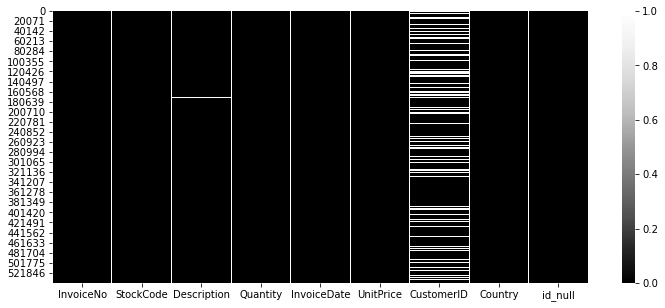

In [16]:
# 결측치를 heatmap으로 시각화 합니다.
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(), cmap='Greys_r')

Seaborn's heatmap can help us visualize where most of our missing data is present. Looks like eliminating the data with missing customer ids is going to cut down a huge chunk of our dataset. 


Seaborn의 히트 맵은 대부분의 누락 된 데이터가있는 위치를 시각화하는 데 도움이됩니다. 고객 ID가 누락 된 데이터를 제거하면 데이터 세트가 크게 줄어들 것 같습니다.

누락된 ID는 코호트 분석시 추정이 안되기 때문에 제거하고 분석에 들어갑니다.

In [20]:
df = df.dropna(subset=['CustomerID'])

In [21]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
id_null        0
dtype: int64

In [23]:
print(df.shape)
df.describe()

(406829, 9)


,Quantity,UnitPrice,CustomerID,id_null
count,406829.000000,406829.000000,406829.000000,406829.0
mean,12.061303,3.460471,15287.690570,0.0
std,248.693370,69.315162,1713.600303,0.0
min,-80995.000000,0.000000,12346.000000,0.0
25%,2.000000,1.250000,13953.000000,0.0
50%,5.000000,1.950000,15152.000000,0.0
75%,12.000000,3.750000,16791.000000,0.0
max,80995.000000,38970.000000,18287.000000,0.0


Now that we've removed the null values, we have a little over 400,000 observations remaining. That's nearly 20% of our data set eliminated. That's not all the cleaning we have here. from the previous table it looks like there are quite a few negative values. What could this be?

이제 null 값을 제거 했으므로 400,000 개가 넘는 관측치가 남아 있습니다. 데이터 세트의 거의 20%가 제거되었습니다. 전처리가 다 된게 아닙니다. 이전 표에서 꽤 음의 값이있는 것처럼 보입니다. 이것이 무엇일까요?

In [24]:
df[df['Quantity'] < 0]

# C => cancel된거 구나

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,0
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,0
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,0
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,0
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,0
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,0
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,0
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,0


Let's take one of the above customers so we can investigate a little further.

좀 더 자세히 조사 할 수 있도록 위의 고객 중 하나를 살펴 보겠습니다.

In [25]:
df[df['CustomerID']  == 17548]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,0
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,0
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,0
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,0
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom,0
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,0
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,0
165024,550755,22585,PACK OF 6 BIRDY GIFT TAGS,24,2011-04-20 12:01:00,1.25,17548.0,United Kingdom,0
165025,550755,22082,RIBBON REEL STRIPES DESIGN,10,2011-04-20 12:01:00,1.65,17548.0,United Kingdom,0
165026,550755,22081,RIBBON REEL FLORA + FAUNA,10,2011-04-20 12:01:00,1.65,17548.0,United Kingdom,0


Just by observing the invoices of this customer alone, we can see that each quantity which is positive has a negative counterpart. Being an ecommerce store, this can only mean one thing. The item was either returned or cancelled. It also looks like there is a particular trend with the invoice ids of these cancelled transactions, they all seem to have a "C" at the start.

We can't just assume that all the negative values are a result of a cancellation but for the purpose of our specific analysis, we cannot have negative values in our data set as this would lead to quite with or data modelling during the normalization stage. For that reason, we will remove all the observations with negative values. The negative values as well as the null values could use a whole different analysis as there could be trends to find, especially finding out which products were cancelled most often and why perhaps.

이 고객의 송장 만 관찰하면 양의 양이 음수임을 알 수 있습니다. 전자 상거래 상점이므로 한 가지만 의미 할 수 있습니다. 상품이 반품 또는 취소되었습니다. 또한 취소 된 거래의 인보이스 ID에 특정 추세가있는 것 같습니다. 모두 시작시 "C"가있는 것 같습니다.

모든 음수 값이 취소의 결과라고 가정 할 수는 없지만 특정 분석의 목적으로 정규화 단계에서 데이터 모델링과 함께 또는 데이터 모델링으로 이어질 수 있으므로 데이터 세트에 음수 값을 가질 수 없습니다. 이러한 이유로 음수 값을 가진 모든 관측 값을 제거합니다. 음수 값과 널 (NULL) 값은 특히 어떤 제품이 가장 자주 취소되었는지, 그리고 아마도 이유를 찾는 경향이 있기 때문에 완전히 다른 분석을 사용할 수 있습니다.

In [26]:
# Quantity 가 0 보다 큰 값만 df에 담습니다.
df = df[df['Quantity'] > 0]

In [27]:
# UnitPrice 가 0 보다 큰 값만 df에 담습니다.
df = df[df['UnitPrice'] > 0]

Getting rid of the duplicate observations is also important inorder to prevent our data from getting skewed.

데이터가 왜곡되는 것을 막기 위해 중복 관측 값을 제거하는 것도 중요합니다.

In [28]:
# drop_duplicates로 중복을 제거합니다.
# 전체행의 모든값이 같은것을 제거

print(df.shape)
df = df.drop_duplicates()
df.shape

(397884, 9)


(392692, 9)

In [29]:
df.describe()

# QTY 의 min 값에 - 값이 사라진것을 확일 할 수 있음
# UnitPrice의 표준편차도 전과 비교해서 작아적음

,Quantity,UnitPrice,CustomerID,id_null
count,392692.000000,392692.000000,392692.000000,392692.0
mean,13.119702,3.125914,15287.843865,0.0
std,180.492832,22.241836,1713.539549,0.0
min,1.000000,0.001000,12346.000000,0.0
25%,2.000000,1.250000,13955.000000,0.0
50%,6.000000,1.950000,15150.000000,0.0
75%,12.000000,3.750000,16791.000000,0.0
max,80995.000000,8142.750000,18287.000000,0.0


# EDA

Now that we've taken care of the data cleaning, we can finally do some exploratory data analysis. We can see that our data set has been cut down even further to around 392,692 observations.

데이터 정리를 처리 했으므로 이제 탐색 적 데이터 분석을 수행 할 수 있습니다. 데이터 세트가 약 392,692 개의 관측치로 훨씬 더 축소되었음을 알 수 있습니다.

In [30]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0


In [31]:
# Quantity와 UnitPrice를 곱해서 TotalCost 값을 만듭니다.
df['TotalCost']= df['Quantity']*df['UnitPrice']

There was no total cost of purchase column, something which is the basis of our analysis. I've as a result created a column where we simply multiply the Quantity with the UnitPrice.

총 구매 비용 열이 없었으며 수량에 단가를 곱하는 열을 만들었습니다.

In [32]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,22.00


In [33]:
df.describe()

# TotalCost의 75% 값은 19.8 인데 max값이 엄청 크네? 이상치 일 수 있으니 확인해 보자

,Quantity,UnitPrice,CustomerID,id_null,TotalCost
count,392692.000000,392692.000000,392692.000000,392692.0,392692.000000
mean,13.119702,3.125914,15287.843865,0.0,22.631500
std,180.492832,22.241836,1713.539549,0.0,311.099224
min,1.000000,0.001000,12346.000000,0.0,0.001000
25%,2.000000,1.250000,13955.000000,0.0,4.950000
50%,6.000000,1.950000,15150.000000,0.0,12.450000
75%,12.000000,3.750000,16791.000000,0.0,19.800000
max,80995.000000,8142.750000,18287.000000,0.0,168469.600000


In [34]:
# 단체구매건일 가능성이 큼
# 분석값 정확도에 영향을 줄 수 있음으로 이값은 제거하자. 
df[df['TotalCost'] > 160000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null,TotalCost
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,0,168469.6


During our preliminary analysis, we noticed that there was an outlier in our data set that had made a pretty substantial purchase. Although there are quite a few outliers in our data set, the issue with this values is that this was a cancelled order. For the sake of our Cohort Analysis as well as clustering to be performed later on, it would be in our best interest to eliminate this value as it doesn't add any values to our analysis and tends to mislead us.

예비 분석 과정에서 데이터 세트에 상당히 많은 구매가 이루어진 특이 치가 있음을 알았습니다. 데이터 세트에는 꽤 많은 특이 치가 있지만이 값의 문제는 주문이 취소되었다는 것입니다. 코호트 분석 및 클러스터링을 위해 나중에 수행하려면 분석에 값을 추가하지 않고 오해하는 경향이 있으므로이 값을 제거하는 것이 가장 좋습니다.

In [35]:
# TotalCost 가 160000 보다 작은 값만 df 에 담습니다.
df = df[df['TotalCost'] < 160000].copy()
df.shape

(392691, 10)

## **Most purchased products**

Let's find out which products sold best with our customers. This can help us keep track of demand, helping us make sure that we are stocked up and ready to provide the best service.

어떤 제품이 고객에게 가장 잘 팔렸는지 알아 봅시다. 이를 통해 수요를 추적하고 최상의 서비스를 제공 할 준비가되었는지 확인할 수 있습니다.

In [40]:
df['StockCode'].value_counts()

85123A    2023
22423     1713
85099B    1615
84879     1395
47566     1389
          ... 
90033        1
47579        1
22218        1
90028        1
90048        1
Name: StockCode, Length: 3664, dtype: int64

In [38]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2016
REGENCY CAKESTAND 3 TIER               1713
JUMBO BAG RED RETROSPOT                1615
ASSORTED COLOUR BIRD ORNAMENT          1395
PARTY BUNTING                          1389
                                       ... 
LETTER "T" BLING KEY RING                 1
SILVER BOOK MARK WITH BEADS               1
FLOWER GLASS GARLD NECKL36"TURQUOIS       1
BLACK 3 BEAD DROP EARRINGS                1
HEN HOUSE W CHICK IN NEST                 1
Name: Description, Length: 3876, dtype: int64

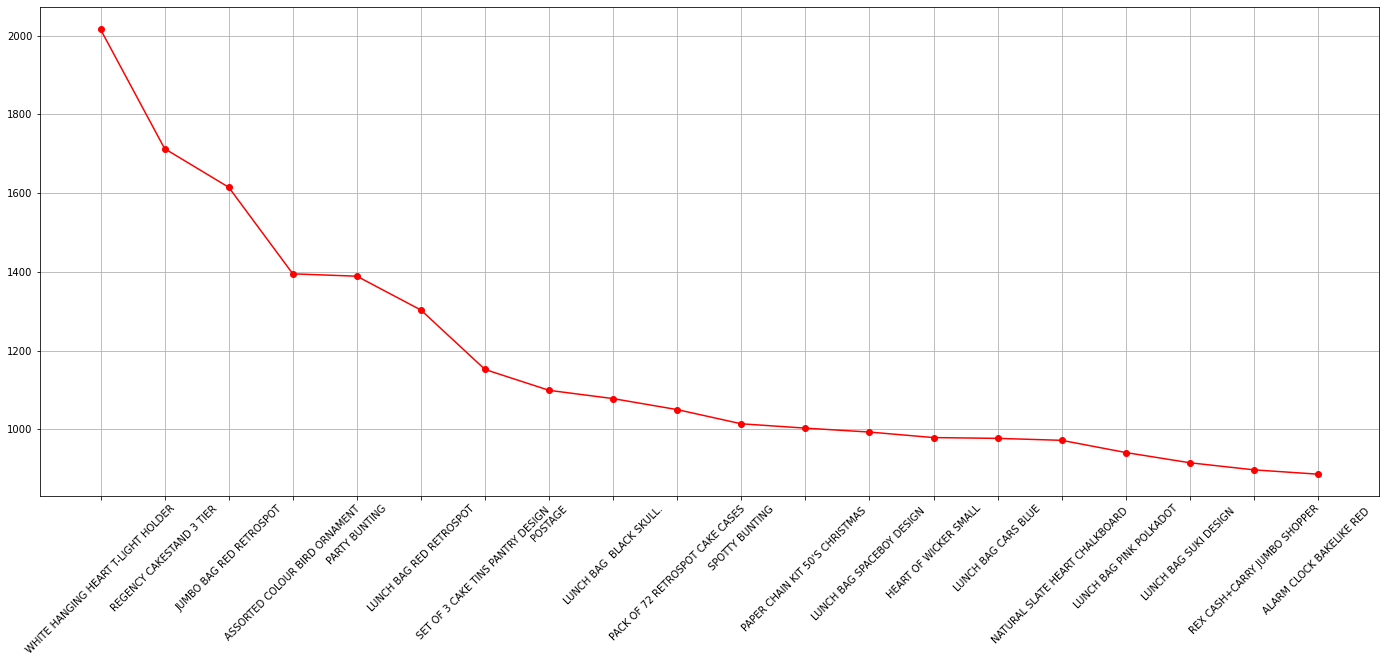

In [36]:
most_purchased_prods = pd.DataFrame(df['Description'].value_counts().head(20))
most_purchased_prods = most_purchased_prods.rename(columns={'Description':'Count'})


plt.figure(figsize=(24,9))
plt.xticks(rotation=45)
plt.plot(most_purchased_prods, 'ro-') #'ro-':( r : color red / 0 : 점으로 표현하는 마커 / - : 선종류 )
plt.grid()

# 롱테일 형태구나! 

<AxesSubplot:>

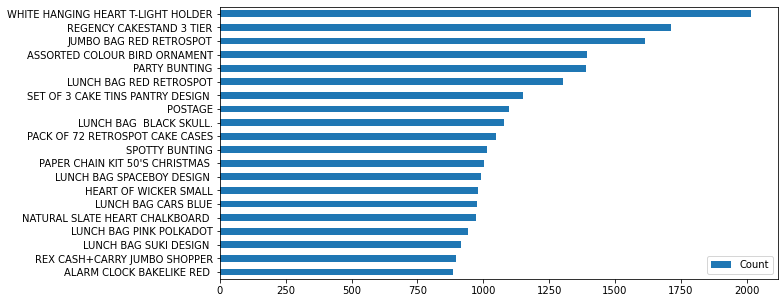

In [37]:
most_purchased_prods.sort_values('Count').plot.barh(figsize =(10,5))

## **Country with the most purchases**

From the chart below, we can see that majority of our sales come from the United Kingdom.

This doesn’t tell the whole story though. We would also like to do some more exploration on the other countries and find out which ones are doing well.

아래 차트에서 판매의 대부분이 영국에서 나온 것을 볼 수 있습니다.

그러나 이것은 전체 이야기를 알려주지는 않습니다. 우리는 또한 다른 나라들에 대해 더 많은 탐구를하고 어떤 나라들이 잘하고 있는지 알아 내고 싶습니다.

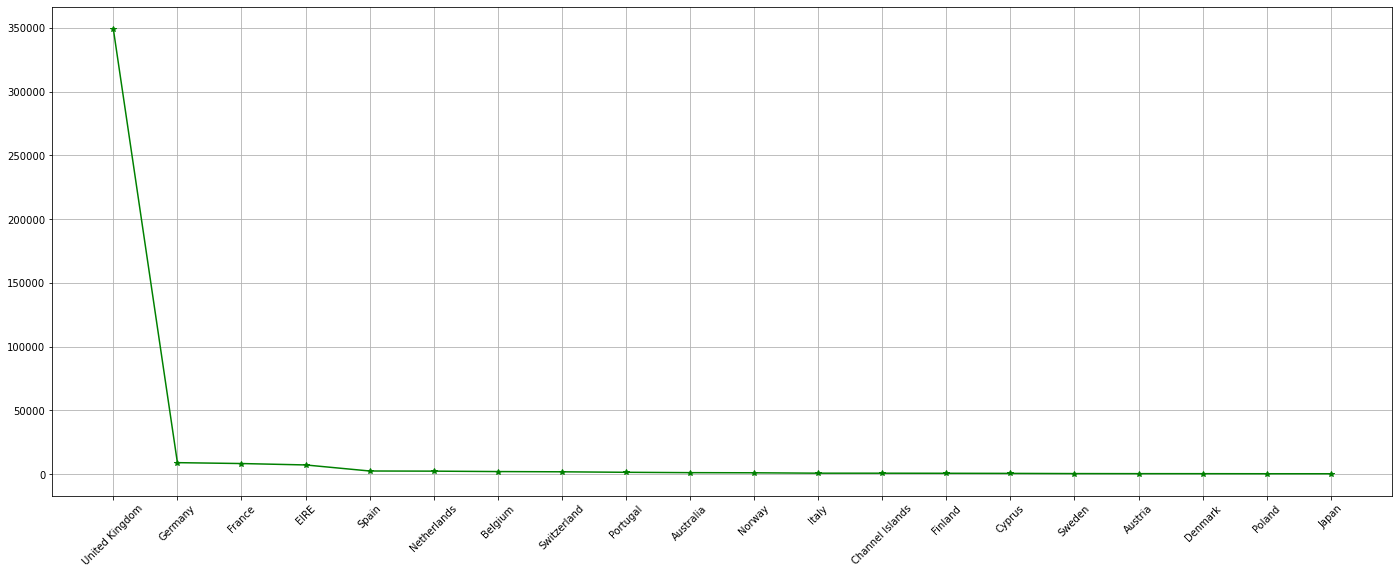

In [41]:
most_purchased_bycountry = pd.DataFrame(df['Country'].value_counts().head(20)).rename(columns={'Country':'Count'})

plt.figure(figsize=(24,9))
plt.xticks(rotation=45)
plt.plot(most_purchased_bycountry, 'g*-')
plt.grid()

# 영국에 있는 온라인 몰이기 때문에 영국에서 가장 많이 판매됨
# 영국과 다른나라들과의 스케일 차이가 많이 나기 때문에 영국만 빼고 봐보자.

We now have a much clearer view of what’s going on with the other countries from the chart below. 

It seems that Ireland, France, Germany are doing quite well in terms of total purchases. Perhaps further investment in these countries should be considered or setting up shop in these locations can help reduce shipping costs and drive up sales.

이제 아래 차트에서 다른 국가와 진행 상황을 훨씬 명확하게 확인할 수 있습니다.

아일랜드, 프랑스, 독일은 총 구매 측면에서 꽤 잘하고있는 것 같습니다. 아마도 이들 국가에 대한 추가 투자를 고려하거나이 지역에 매장을 설립하면 운송 비용을 줄이고 판매를 촉진 할 수 있습니다.

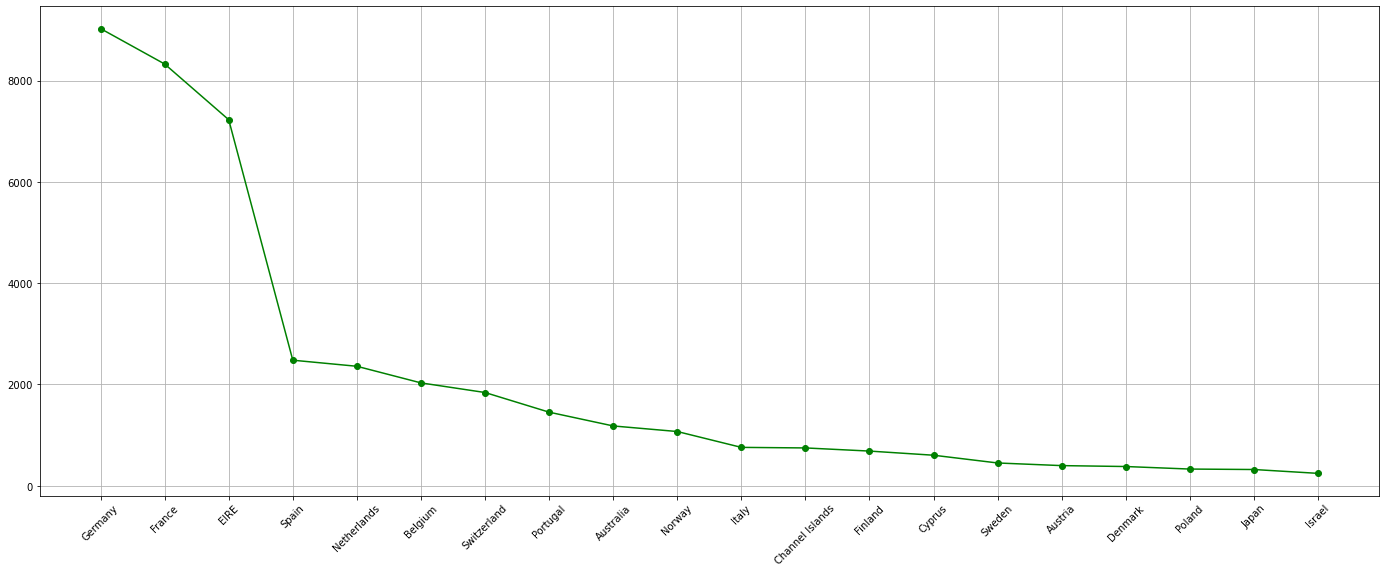

In [42]:
nonuk_df = df[df['Country'] != 'United Kingdom']
most_purchased_bycountry_nonuk = pd.DataFrame(nonuk_df['Country'].value_counts().head(20)).rename(columns={'Country':'Count'})

plt.figure(figsize=(24,9))
plt.xticks(rotation=45)
plt.plot(most_purchased_bycountry_nonuk, 'go-')
plt.grid()

It makes sense that United Kingdom is the most popular amongst our customers as most of our operations are based in the UK.

## **Country-wise Revenue**

In [43]:
# id_null 컬럼을 사용했기 때문에 제거합니다.
df.drop('id_null', axis =1)

# or
# def df['id_null']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


## **Cardinality of the dataset**
unique한 값의 개수

In [44]:
print('Number of unique Invoice Nos: {}'.format(
    len(df.InvoiceNo.unique())))

print('Number of unique StockCode: {}'.format(
    len(df.StockCode.unique())))

print('Number of different Descriptions: {}'.format(
    len(df.Description.unique())))

print('Number of unique Customer Ids: {}'.format(
    len(df.CustomerID.unique())))

print('Number of different Countries: {}'.format(
    len(df.Country.unique())))

Number of unique Invoice Nos: 18531
Number of unique StockCode: 3664
Number of different Descriptions: 3876
Number of unique Customer Ids: 4338
Number of different Countries: 37


In [45]:
# 다른 방법
df.nunique()

# 하루에 약 60건의 주문 발생

InvoiceNo      18531
StockCode       3664
Description     3876
Quantity         300
InvoiceDate    17281
UnitPrice        440
CustomerID      4338
Country           37
id_null            1
TotalCost       2938
dtype: int64

We will need to convert the InvoiceDate column to datetime value for further use.


나중에 사용할 수 있도록 InvoiceDate 열을 날짜 / 시간 값으로 변환해야합니다.

In [47]:
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 392691, dtype: datetime64[ns]

In [48]:
#Creating a datetime value for out InvoiceDate Column
df['InvoiceDateCon'] = df['InvoiceDate'].dt.date
df['InvoiceDateCon'].head(3)

0    2010-12-01
1    2010-12-01
2    2010-12-01
Name: InvoiceDateCon, dtype: object

In [29]:
# object 타입을 다시 datetime으로 바꾼다.

df['InvoiceDateCon'] = pd.to_datetime(df['InvoiceDateCon'])
df['InvoiceDateCon'].head(3)

0   2010-12-01
1   2010-12-01
2   2010-12-01
Name: InvoiceDateCon, dtype: datetime64[ns]

In [49]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null,TotalCost,InvoiceDateCon
488930,577856,20726,LUNCH BAG WOODLAND,10,2011-11-22 11:19:00,1.65,12490.0,France,0,16.5,2011-11-22
407353,571883,84821,DANISH ROSE DELUXE COASTER,12,2011-10-19 13:58:00,0.85,14704.0,United Kingdom,0,10.2,2011-10-19
412694,572295,22467,GUMBALL COAT RACK,2,2011-10-23 13:49:00,2.55,16686.0,United Kingdom,0,5.1,2011-10-23
70690,542096,21385,IVORY HANGING DECORATION HEART,48,2011-01-25 12:52:00,0.85,17236.0,United Kingdom,0,40.8,2011-01-25
200309,554124,84510A,SET OF 4 ENGLISH ROSE COASTERS,10,2011-05-23 08:31:00,1.25,13339.0,United Kingdom,0,12.5,2011-05-23


# Cohort Analysis

## **What exactly is a cohort?**

A cohort is a group of subjects that share the same characteristic. Cohort analysis plays an important role in digital marketing as it gives us an overview of how customers behave. It allows us to get more information on which marketing campaigns perform well, which campaigns were profitable, who tends to add more value and where you need to be allocating budgets. Although we do narrow things down to a number, there are several factors that need to be taken into consideration, this is where domain and industry knowledge comes into play.

Cohorts are of different types:

1. Time Cohorts: Using a timestamp to group customers; a good example would be grouping based on the month of first purchase.

1. Behavior Cohorts: Here, customers are grouped based on previous activity like products bought or services subscribed to.

1. Size Cohorts: Categorizing customers based on amount spent over a specific period of time is a good instance of Size Cohorts. 


** 코호트 란 정확히 무엇입니까? **

코호트는 동일한 특성을 공유하는 주제 그룹입니다. 코호트 분석은 고객의 행동 방식에 대한 개요를 제공하므로 디지털 마케팅에서 중요한 역할을 합니다. 이를 통해 어떤 마케팅 캠페인의 실적, 수익성있는 캠페인, 더 많은 가치를 창출하려는 경향 및 예산을 할당해야하는지에 대한 자세한 정보를 얻을 수 있습니다. 우리는 여러 가지로 범위를 좁히지 만, 고려해야 할 몇 가지 요소가 있습니다. 이는 도메인 및 산업 지식이 작용하는 곳입니다.

-시간을 두고 비슷한 그룹을 비교하는 것(가입한 달, 사용 개월수 등으로 분류한 사용자 그룹)

코호트 유형은 다음과 같습니다.

1. **타임 코호트** : 타임 스탬프를 사용하여 고객을 그룹화합니다. 좋은 예는 첫 구매 월을 기준으로 그룹화하는 것입니다.
- (요번 실습에서 사용할 코호트는 타임 코호트 이다)

1. 행동 코호트 : 여기서 고객은 구매 한 제품 또는 가입 한 서비스와 같은 이전 활동을 기준으로 그룹화됩니다.(어떤 카테고리를 많이 사는지)

1. 규모 코호트 : 특정 기간 동안 소비 한 금액을 기준으로 고객을 분류하는 것이 크기 코호트의 좋은 예입니다.(주로 싼 제품을 사는지, 비싼 제품을 사는지)


https://en.wikipedia.org/wiki/Cohort_analysis

코호트 분석은 모든 사용자를 하나의 단위로 보지 않고 주어진 데이터 세트에서 데이터를 가져 오는 행동 분석의 하위 세트로, 분석을 위해 관련 그룹으로 분류합니다. 이러한 관련 그룹 또는 코호트는 일반적으로 정의 된 시간 범위 내에서 공통된 특성 또는 경험을 공유합니다.

* 해당 분석에서는 월별 타임 코호트 분석을 하겠습니다.

In [50]:
# datetime 라이브러리를 사용해서 dt.datetime 으로 (연, 월, 1) 로 날짜를 만들어주는 함수를 구현하고
# apply를 통해 get_month 함수를 InvoiceDateCon 컬럼에 적용하고 InvoiceDateCon 에 다시 저장합니다.

# datetime으로 다시 반환하는 함수
def get_month(x): 
    return dt.datetime(x.year, x.month,1)

df['InvoiceDateCon'] = df['InvoiceDateCon'].apply(get_month)

In [51]:
# 연-월 
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null,TotalCost,InvoiceDateCon
475301,576876,21682,LARGE MEDINA STAMPED METAL BOWL,2,2011-11-16 16:42:00,4.95,16804.0,United Kingdom,0,9.90,2011-11-01
138995,548258,22973,CHILDREN'S CIRCUS PARADE MUG,12,2011-03-30 11:04:00,1.65,14146.0,United Kingdom,0,19.80,2011-03-01
190485,553195,POST,POSTAGE,1,2011-05-15 13:45:00,18.00,12599.0,France,0,18.00,2011-05-01
452812,575392,21209,MULTICOLOUR HONEYCOMB FAN,12,2011-11-09 15:42:00,0.39,14234.0,United Kingdom,0,4.68,2011-11-01
367610,568898,23145,ZINC T-LIGHT HOLDER STAR LARGE,12,2011-09-29 13:17:00,0.95,13354.0,United Kingdom,0,11.40,2011-09-01


In [52]:
df.nunique()

InvoiceNo         18531
StockCode          3664
Description        3876
Quantity            300
InvoiceDate       17281
UnitPrice           440
CustomerID         4338
Country              37
id_null               1
TotalCost          2938
InvoiceDateCon       13
dtype: int64

We can now use this column to manipulate the dataset and create the columns we need. For our use case, we would need to create the Cohort Month column.
The steps we perform:
1. Group the data set by CustomerID
1. Select the InvoiceDate for that grouping
1. We can then use the transform function to get the earliest month that the customer made a purchase. This month is their cohort.

이제이 열을 사용하여 데이터 집합을 조작하고 필요한 열을 만들 수 있습니다. 사용 사례의 경우 동질 집단 월 열을 작성해야합니다.

우리가 수행하는 단계 :
1. CustomerID별로 데이터 세트를 그룹화하십시오.
1. 해당 그룹에 대한 InvoiceDate를 선택하십시오
1. 그런 다음 변환 기능을 사용하여 고객이 구매 한 가장 빠른 달을 얻을 수 있습니다. 이번 달은 코호트입니다.

In [ ]:
# transform('min) 각 고객의 최초 구매월 
# transform('max') 각 고객의 마지막 구매월  반환
# 월 인 이유는 바로위에서 일자를 일괄적으로 1일로 다 만들어 버렸기 때문

# df['CohortMonth'] = df.groupby('CustomerID')['InvoiceDateCon'].transform('min')

In [55]:
df.groupby('CustomerID')['InvoiceDateCon'].transform('min')

0        2010-12-01
1        2010-12-01
2        2010-12-01
3        2010-12-01
4        2010-12-01
            ...    
541904   2011-08-01
541905   2011-08-01
541906   2011-08-01
541907   2011-08-01
541908   2011-08-01
Name: InvoiceDateCon, Length: 392691, dtype: datetime64[ns]

In [54]:
df.groupby('CustomerID')['InvoiceDateCon'].min()

CustomerID
12346.0   2011-01-01
12347.0   2010-12-01
12348.0   2010-12-01
12349.0   2011-11-01
12350.0   2011-02-01
             ...    
18280.0   2011-03-01
18281.0   2011-06-01
18282.0   2011-08-01
18283.0   2011-01-01
18287.0   2011-05-01
Name: InvoiceDateCon, Length: 4338, dtype: datetime64[ns]

In [56]:
# CustomerID 를 인덱스로 InvoiceDateCon 을 value로 하는 groupby 를 생성하고 grouping 변수에 담습니다.
# grouping.transform 을 통해 'min' 값을 찾아 CohortMonth 라는 새로운 컬럼에 담습니다.

grouping = df.groupby('CustomerID')['InvoiceDateCon']
df['CohortMonth'] = grouping.transform('min')

# ['CohortMonth'] 컬럼에 고객의 첫 구매날짜를 넣어주었음

In [58]:
df.tail(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null,TotalCost,InvoiceDateCon,CohortMonth
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,0,16.60,2011-12-01,2011-08-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,0,14.85,2011-12-01,2011-08-01


To start off, we need to have some data ready before we can do any sort of analysis. We need the Cohort Index, which is basically the number of months that have passed since the customer has made their first purchase.

All we have to do now is to calculate the difference between the cohort month and invoice month to get a unique cohort index for each observation.

우선, 모든 종류의 분석을 수행하기 전에 데이터를 준비해야합니다. 고객이 처음 구매 한 지 몇 개월이 지났는지에 대한 코호트 지수가 필요합니다.

코호트 월과 송장 월의 차이를 계산하여 각 관측치에 대해 고유 한 코호트 지수를 얻는 것입니다.

-**첫구매 후 다음 구매까지 얼마나 걸렸는지**

In [40]:
df.sample(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null,TotalCost,InvoiceDateCon,CohortMonth
276128,561033,71053,WHITE METAL LANTERN,4,2011-07-24 11:40:00,3.75,14443.0,United Kingdom,0,15.00,2011-07-01,2010-12-01
435954,574079,23210,WHITE ROCKING HORSE HAND PAINTED,2,2011-11-02 16:19:00,1.25,17595.0,United Kingdom,0,2.50,2011-11-01,2011-11-01
414381,572453,23521,CAT AND BIRD WALL ART,6,2011-10-24 12:37:00,2.89,12921.0,United Kingdom,0,17.34,2011-10-01,2010-12-01
299588,563111,21070,VINTAGE BILLBOARD MUG,12,2011-08-12 11:08:00,1.25,15249.0,United Kingdom,0,15.00,2011-08-01,2011-03-01


In [41]:
# cohort_year = df[CohortMonth]df.year
# cohort_month = df[CohortMonth]df.month

In [59]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month


invoice_year, invoice_month = get_date_int(df, 'InvoiceDateCon')

# 위에서 연도, 월 값을 구한 것 처럼  'CohortMonth'컬럼으로
# cohort_year, cohort_month 값을 구합니다.
cohort_year, cohort_month = get_date_int(df, 'CohortMonth')

# 인보이스에서 코호트 값을 연도와 월에 각각 차이를 구해서 years_diff, months_diff 에 할당합니다.
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

# 연도에는 12를 곱해주고 ㅣ 
# 같은 달에 구매 시 1이 나오게 월에는 1을 더해줍니다.

df['CohortIndex'] = years_diff *12 + (months_diff +1 )
df.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null,TotalCost,InvoiceDateCon,CohortMonth,CohortIndex
486303,577723,21212,PACK OF 72 RETROSPOT CAKE CASES,2,2011-11-21 12:36:00,0.55,16713.0,United Kingdom,0,1.10,2011-11-01,2010-12-01,12
119128,546528,22170,PICTURE FRAME WOOD TRIPLE PORTRAIT,1,2011-03-14 13:04:00,6.75,15311.0,United Kingdom,0,6.75,2011-03-01,2010-12-01,4
311149,564226,21535,RED RETROSPOT SMALL MILK JUG,6,2011-08-24 10:13:00,2.55,12523.0,France,0,15.30,2011-08-01,2011-01-01,8


The chart below should give us a rough idea of how we perform over time.

아래 차트는 시간이 지남에 따라 어떻게 나타나는지 대략적으로 보여줍니다.

<AxesSubplot:xlabel='CohortIndex', ylabel='count'>

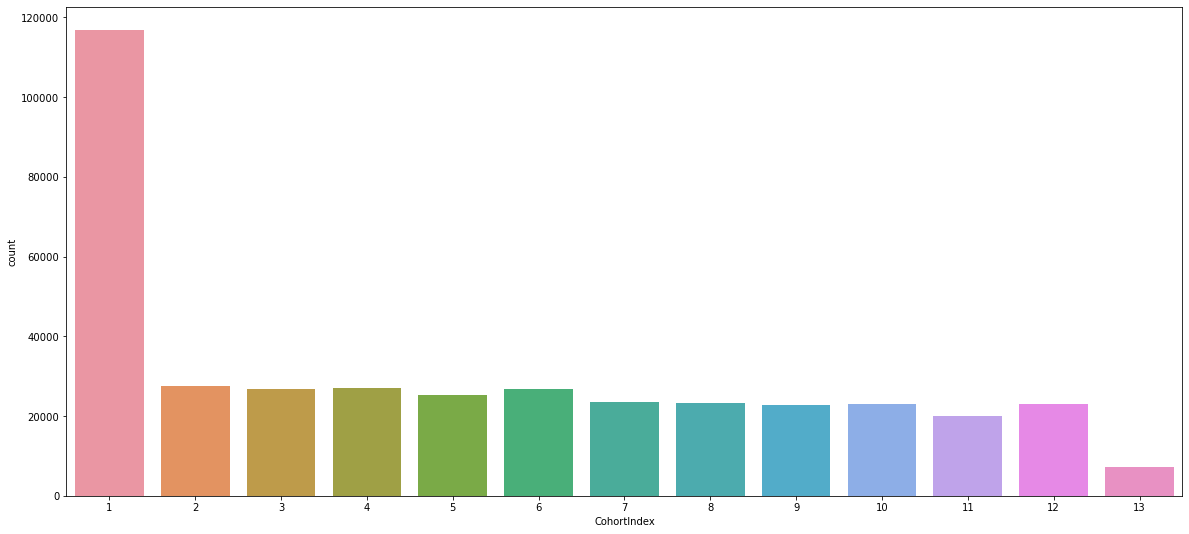

In [60]:
# 고객이 구매한지 몇 개월이 지났는지에 대한 인덱스
plt.figure(figsize=(20,9))
sns.countplot(x='CohortIndex', data=df)

**dt.time 으로 시간분석**

In [61]:
# dt.time 으로 InvoiceDate의 시간을 추출 합니다.
# 시, 분까지 
df['TimeOfPurchase'] = df['InvoiceDate'].dt.time
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null,TotalCost,InvoiceDateCon,CohortMonth,CohortIndex,TimeOfPurchase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,15.30,2010-12-01,2010-12-01,1,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34,2010-12-01,2010-12-01,1,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,22.00,2010-12-01,2010-12-01,1,08:26:00


Using the Datetime package, we can extract the time data from out InvoiceDate column and inspect when most of the purchases are being made. It looks like lunch time is pretty busy. Perhaps purchases made during lunch breaks; sending out marketing communications during the early hours of the day might be more effective as customers would be more inclined to purchase something mid-day.

Datetime 패키지를 사용하여 InvoiceDate 열에서 시간 데이터를 추출하고 대부분의 구매시기를 검사 할 수 있습니다. 점심 시간이 꽤 바쁜 것 같습니다. 점심 시간 동안 구매 한 것 같습니다. 하루 중 이른 시간에 마케팅 커뮤니케이션을 보내는 것은 고객이 낮에 무언가를 구매하는 경향이 있기 때문에 더 효과적 일 수 있습니다.

<AxesSubplot:xlabel='TimeOfPurchase'>

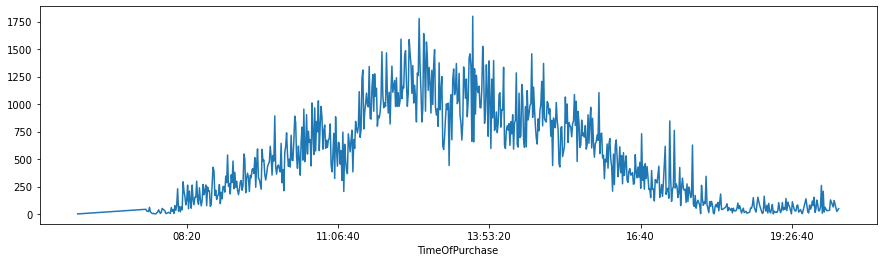

In [62]:
# TimeOfPurchase 컬럼을 그룹화 해서  TimeOfPurchase 컬럼의 count 값을 구하고
# 그리고 time_of_purchase 이라는 변수에 할당해 주세요.
# 시간대별 구매 내역을 scatterplot으로 그립니다.

time_of_purchase = df.groupby(['TimeOfPurchase'])['TimeOfPurchase'].count()
time_of_purchase.plot(figsize = (15,4))

Now that we have the Cohort Index as well as the Cohort Month, we can proceed to group this data. After we've grouped the data we need to count the number of unique customers in that cohort for each month. 

Cohort Month와 Cohort Index가 있으므로이 데이터를 그룹화 할 수 있습니다. 데이터를 그룹화 한 후 매월 해당 코호트의 고유 고객 수를 계산해야합니다.

In [47]:
df.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,id_null,TotalCost,InvoiceDateCon,CohortMonth,CohortIndex,TimeOfPurchase
276383,561043,21754,HOME BUILDING BLOCK WORD,6,2011-07-24 12:20:00,5.95,15708.0,United Kingdom,0,35.70,2011-07-01,2010-12-01,8,12:20:00
503580,578928,22561,WOODEN SCHOOL COLOURING SET,9,2011-11-27 12:29:00,1.65,15443.0,United Kingdom,0,14.85,2011-11-01,2011-01-01,11,12:29:00
93875,544316,22984,CARD GINGHAM ROSE,12,2011-02-17 14:49:00,0.42,16556.0,United Kingdom,0,5.04,2011-02-01,2010-12-01,3,14:49:00


In [48]:
# 중간정리 : CohortMonth => 최초 구매일 
#          : CohortIndex => 최초 구매일로 부터 다음 구매까지의 달 수

# 'CohortMonth', 'CohortIndex' 로 그룹화 하고 grouping 이라는 변수에 담습니다.
# grouping 에서 'CustomerID'의 nunique 값을 구해 cohort_data 라는 변수에 담습니다.
# cohort_data 변수에 담긴 값을 reset_index 로 데이터프레임으로 변경합니다.
# cohort_data 데이터프레임으로 피봇을 해서 형태를 변경합니다.
# 이 때 index='CohortMonth', columns='CohortIndex', values='CustomerID' 로 피봇합니다.

grouping = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].nunique()
cohort_data = cohort_data.reset_index()
cohort_counts = pd.pivot_table(cohort_data, index='CohortMonth', columns='CohortIndex', values='CustomerID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,26.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# 위의 과정을 다른 방법으로도 가능함

cohort_counts = df.groupby(['CohortMonth','CohortIndex'])['CustomerID'].nunique().unstack()
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,26.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can now calculate the number of unique customers in each cohort. With the new dataframe, we can use the Pandas pivot function to create a table with Cohort Month as your index, Cohort Index as your columns and unique CustomerIDs as your values. The resulting table should look something like this:

이제 각 코호트에서 고유 한 고객 수를 계산할 수 있습니다. 새로운 데이터 프레임에서는 팬더 피벗 기능을 사용하여 코호트 월을 인덱스로, 코호트 인덱스를 열로, 고유 CustomerID를 값으로 사용하여 테이블을 만들 수 있습니다. 결과 테이블은 다음과 같아야합니다.

<AxesSubplot:xlabel='CohortIndex', ylabel='CohortMonth'>

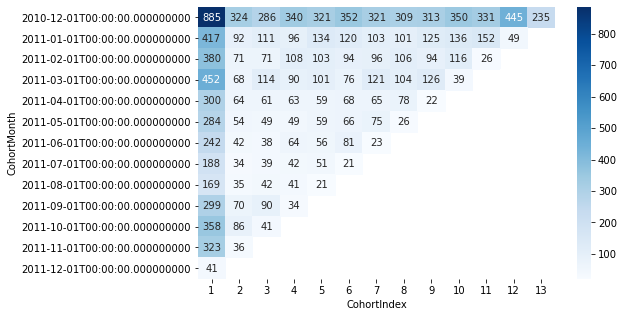

In [64]:
# cohort_counts 값을 출력해 봅니다.
plt.figure(figsize = (8,5))
sns.heatmap(cohort_counts, cmap='Blues' , annot =True, fmt ='.0f')

Now that we have a table to with our Cohort Data, we can also calculate the percentage of customers that chose to come back in each preceeding month. This is the basis of our Customer Retention table.

코호트 데이터와 관련된 표를 작성 했으므로 각 월에 다시 방문하기로 선택한 고객의 비율을 계산할 수도 있습니다. 이것이 고객 유지 테이블의 기초입니다.

첫번째 달이 100%, 
첫달을 기준으로 나누어 준다.

In [67]:
cohort_counts[1]

CohortMonth
2010-12-01    885.0
2011-01-01    417.0
2011-02-01    380.0
2011-03-01    452.0
2011-04-01    300.0
2011-05-01    284.0
2011-06-01    242.0
2011-07-01    188.0
2011-08-01    169.0
2011-09-01    299.0
2011-10-01    358.0
2011-11-01    323.0
2011-12-01     41.0
Name: 1, dtype: float64

In [65]:
# cohort_counts 를 cohort_counts 로 div 로 나눠줍니다.
# retention_round 라는 변수에 소숫점 한자리를 표현하는 백분위 값을 만들어 할당합니다.

retention_round = cohort_counts.div(cohort_counts[1], axis = 0).round(3) *100
retention_round

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01-01,100.0,22.1,26.6,23.0,32.1,28.8,24.7,24.2,30.0,32.6,36.5,11.8,NaN
2011-02-01,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,NaN,NaN
2011-03-01,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04-01,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.2,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.7,26.4,23.1,33.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
# retention_round.index 으로 표현하면 날짜가 너무 길게 표시가 되기 때문에 
# index 에서 date만 가져와서 index 에 넣어줍니다.
retention_round.index = retention_round.index.date

<AxesSubplot:xlabel='CohortIndex'>

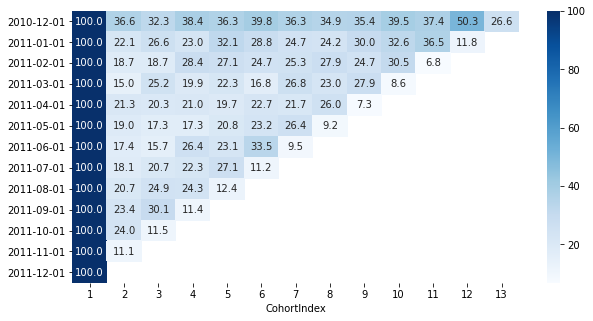

In [72]:
# 위에서 구한 retention_round 로 heatmap을 그립니다.
plt.figure(figsize = (10,5))
sns.heatmap(retention_round, cmap='Blues' , annot =True,fmt ='.1f')

In [73]:
# TimeOfPurchase 는 이제 사용안할꺼라서 del을 사용해 삭제합니다. 
del df['TimeOfPurchase']

# Feature engineering
We can now begin the creation of out RFM columns. To start off, we would need the timestamp of the last invoice so we can calculate the difference between the timestamp and the invoce date, this should help us calculate the recency metric.

이제 RFM 열 생성을 시작할 수 있습니다. 시작하려면 마지막 인보이스의 타임 스탬프가 필요하므로 타임 스탬프와 인보이스 날짜 간의 차이를 계산할 수 있습니다. 이는 최근 성 메트릭을 계산하는 데 도움이됩니다.

In [74]:
dt.timedelta(days =1)

datetime.timedelta(days=1)

In [76]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [77]:
last_timestamp = df['InvoiceDate'].max() + dt.timedelta(days =1)

In [78]:
# Dataset인 df 에서 가장 최근 데이터의 날짜가 무었인지 구하였다.

last_timestamp

Timestamp('2011-12-10 12:50:00')

## RFM

Since this is a Recency, Frequency and Monetary Table, grouping is done based on each CustomerID. Or goal is to group by CustomerID, then calculate how far back the customer made their last purchase, howw often the customer made a purchase from our site and the total amount spent by each customer. This is pretty straighforward and can be done using the aggregate function.

Recency(최근성), Frequency(구매빈도), Monetary(구매금액) 그룹화는 각 CustomerID를 기반으로 수행됩니다. 또는 목표는 CustomerID별로 그룹화 한 다음 고객이 마지막으로 구매 한 기간, 고객이 당사 사이트에서 구매 한 빈도 및 각 고객이 소비 한 총 금액을 계산하는 것입니다. 이것은 매우 간단하며 집계 함수를 사용하여 수행 할 수 있습니다.


[RFM - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/RFM)

RFM은 가치있는 고객을 추출해내어 이를 기준으로 고객을 분류할 수 있는 매우 간단하면서도 유용하게 사용될 수 있는 방법으로 알려져 있어 마케팅에서 가장 많이 사용되고 있는 분석방법 중 하나이다. RFM은 구매 가능성이 높은 고객을 선정하기 위한 데이터 분석방법으로서, 분석과정을 통해 데이터는 의미있는 정보로 전환된다.

* RFM은 Recency, Frequency, Monetary의 약자로 고객의 가치를 다음의 세 가지 기준에 의해 계산하고 있다.

    * Recency - 거래의 최근성: 고객이 얼마나 최근에 구입했는가?
    * Frequency - 거래빈도: 고객이 얼마나 빈번하게 우리 상품을 구입했나?
    * Monetary - 거래규모: 고객이 구입했던 총 금액은 어느 정도인가?


* 모형
Scoring 기법: RFM의 요인을 각각 5등급으로 등간격으로 분류하는 방법이다.
현재 개발된 RFM 모형은 크게 4가지로 분류 할 수 있다. 이 문서의 내용들은 정설이 아니며 신뢰하기 어려움을 전제로 참고해야한다.
    * 모델1. RFM 각 요소의 20% rule의 적용
    * 모델2. 비율 척도에 의한 양적인 정도의 차이에 따른 등간격의 5등급 분류
    * 모델3. 상하 20%를 제외한 등간격 척도에 의한 그룹 분류
    * 모델4. 군집 분석에 의한 각 요소 별 5개의 그룹 분류

* Data Mining 기법을 이용한 모형
* 회귀분석
* 선형 회귀 분석을 이용한 모형: 고객의 구매 최근성, 구매 빈도, 구매 금액 등 고객의 수익 기여도를 나타내는 세가지 지표들의 선형결합으로 세가지 지표들을 점수화 한다.
* 다중 회귀 분석을 이용한 모형: 각 고객의 구매 행동을 나타내는 R,F,M의 변수들을 독립변수로하고 고객의 미래 구매 행동을 예측하는 기법.
* 신경망을 적용한 모형: 로지스틱 회귀 모형을 보완하는 차원에서 연구.
* 확률적 RFM모형:Colombo와 Weina의 확률적인 RFM모형은 과거의 고객의 응답 이력으로 고객의 미래 응답을 예측하는 행동모델이다

In [ ]:
df.head(1)

In [79]:
# CustomerID 별로 R, F, M을 구한다.

# x.max() 해당 고객이 가장 최근에 구한 일자
rfm = df.groupby(['CustomerID']).agg({'InvoiceDate': lambda x : (last_timestamp - x.max()).days, # R
                                        'InvoiceNo':'count', # F : InvoiceNo 횟수로 주문횟수를 계산합니다.
                                      'TotalCost': 'sum'})   # M : TotalCost 의 합계로 전체 주문 금액을 구합니다.
rfm.head()

,InvoiceDate,InvoiceNo,TotalCost
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [80]:
# 각 컬럼의 이름을 Recency, Frequency, MonetaryValue 로 변경합니다.
rfm.rename(columns={'InvoiceDate':'Recency' ,
                    'InvoiceNo':'Frequency', 
                    'TotalCost':'MonetaryValue'}
           ,inplace= True)

In [81]:
rfm.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [82]:
rfm.describe()

,Recency,Frequency,MonetaryValue
count,4338.000000,4338.000000,4338.000000
mean,92.583679,90.523513,2009.852304
std,100.019339,225.507058,8622.507371
min,1.000000,1.000000,2.900000
25%,18.000000,17.000000,306.452500
50%,51.000000,41.000000,668.495000
75%,142.750000,98.000000,1659.132500
max,374.000000,7676.000000,280206.020000


We can now segment the data based on our requirements. For this case study, we'll divide the rfm data into 4 quantiles and assign them a label between 1 and 4. This should help us score each customer and bringing things down to one number can help simplyfying your segmentation process.


이제 요구 사항에 따라 데이터를 분류 할 수 있습니다. 이 사례 연구에서는 rfm 데이터를 4 개의 Quantile로 나누고 1에서 4 사이의 레이블을 지정합니다. 이렇게하면 각 고객의 점수를 매기고 하나의 숫자로 항목을 가져 오면 단순히 세분화 프로세스를 단순화하는 데 도움이됩니다.

In [86]:
print(list(range(4,0,-1)))
list(range(4,0))

[4, 3, 2, 1]


[]

In [87]:
#Building RFM segments

r_labels=range(4,0,-1) # R의 경우 값이 작을수록 좋은것이 때문에 작을 수록 높은 점수 부여 
f_labels=range(1,5)
m_labels=range(1,5)

In [88]:
# qcut : 연속한 수치 데이터를 카테고리로 범주화(그룹화) 시켜줌
# q : 몇개로 나눌 것인지

r_quartiles = pd.qcut(rfm['Recency'], q=4, labels = r_labels)

# rfm['Recency'] 값을 4등분하여 앞에서부터 4점, 3점, 2접, 1점으로 만들어줌

In [89]:
# qcut을 사용해 R, F, M 세그먼트를 q=4 로 나누고 labels 값은 위에서 지정한 각각의 labels 값으로 지정합니다.
r_quartiles = pd.qcut(rfm['Recency'], q=4, labels = r_labels)
f_quartiles = pd.qcut(rfm['Frequency'], q=4, labels =f_labels )
m_quartiles = pd.qcut(rfm['MonetaryValue'], q=4, labels =m_labels)

In [92]:
rfm.head(2)

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.6
12347.0,2,182,4310.0


In [93]:
# assign 을 사용해서 rfm 데이터프레임에 구한 값을 넣습니다.

rfm = rfm.assign(R=r_quartiles,F=f_quartiles,M=m_quartiles)
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,326,1,77183.60,1,1,4
12347.0,2,182,4310.00,4,4,4
12348.0,75,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2


In [99]:
# Build RFM Segment and RFM Score
def add_rfm(x) :
    return str(x['R']) + str(x['F']) + str(x['M']) # R ,F , M 값을 다 더한다.

rfm['RFM_Segment'] = rfm.apply(add_rfm,axis=1 )
# rfm['RFM_Segment'] = str(rfm['R']) + str(rfm['F']) + str(rfm['M'])


rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

rfm.tail()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
18280.0,278,10,180.60,1,1,1,111,3
18281.0,181,7,80.82,1,1,1,111,3
18282.0,8,12,178.05,4,1,1,411,6
18283.0,4,721,2045.53,4,4,4,444,12
18287.0,43,70,1837.28,3,3,4,334,10


We can get a brief over view of how are segments are performing and in which segments most of our customers are present. 

세그먼트의 실적 및 대부분의 고객이있는 세그먼트에 대해 간략하게 살펴볼 수 있습니다.

In [100]:
# groupby 를 통해 RFM_Score 의 각 수치 평균 값을 구합니다.
rfm.groupby('RFM_Score').agg({'Recency': 'mean', # Recency 의 평균
                             'Frequency' : 'mean', # Frequency 의 평균
                             'MonetaryValue':'mean' # MonetaryValue 의 평균
                             }).round(1)

,Recency,Frequency,MonetaryValue
RFM_Score,,,
3,260.6,8.2,157.0
4,177.2,13.6,240.0
5,152.9,21.2,366.6
6,96.1,28.0,820.1
7,79.6,37.9,759.3
8,64.0,55.9,986.6
9,46.1,78.9,1391.5
10,32.4,110.5,2056.4
11,21.3,186.9,4062.0


To narrow down your targeting process, you would want to label your customers better, based on their RFM scores. Again, it depends on how much work you want to put into your customization. You may have the resources available and preparing marketing communications isn't an issue, if that's the case having more segments can provide a more personalized experience.


타겟팅 프로세스의 범위를 좁히려면 고객의 RFM 점수를 기반으로 고객에게 더 나은 라벨을 지정해야합니다. 다시 말하지만, 그것은 당신이 커스터마이징하기 위해 얼마나 많은 일을할지에 달려 있습니다. 더 많은 세그먼트가 더 개인화 된 경험을 제공 할 수있는 경우 리소스를 사용할 수 있고 마케팅 커뮤니케이션 준비가 문제가되지 않을 수 있습니다.

In [102]:
def segments(df):
    if df['RFM_Score'] > 9 :
        return 'Top'
    elif (df['RFM_Score'] > 5) and (df['RFM_Score'] <= 9 ):
        return 'Middle'
    else:  
        return 'Low'
# 이렇게 내가 범위를 정해 줄 수도 있고, 위에서 쓴 qcut 도 사용 가능     


# 위에서 구한 segments 함수를 General_Segment 에 적용합니다.
rfm['General_Segment'] = rfm.apply(segments,axis=1)

# General_Segment 로 범주화 한 Recency, Frequency 의 평균값을 구하고
# MonetaryValue 는 평균과 count 값을 함께 구합니다. 
rfm.groupby('General_Segment').agg({'Recency': 'mean',
                                    'Frequency' :'mean',
                                    'MonetaryValue' : 'mean'
                                   }).round(1)

,Recency,Frequency,MonetaryValue
General_Segment,,,
Low,192.2,15.1,266.3
Middle,72.1,49.4,978.8
Top,20.1,225.6,5246.8


In [103]:
rfm.head(3)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6,Middle
12347.0,2,182,4310.00,4,4,4,444,12,Top
12348.0,75,31,1797.24,2,2,4,224,8,Middle


In [105]:
rfm_cluster = rfm.iloc[:,0:3]
rfm_cluster.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


## K-Means Clustering
Let's create a spearate dataframe which we can use to perform our clustering. This is just to avoid getting too messy with our columns.

클러스터링을 수행하는 데 사용할 수있는 별도의 데이터 프레임을 만들어 보겠습니다. 이것은 열이 너무 지저분 해지지 않도록하기위한 것입니다.

In [106]:
rfm_cluster.describe()

,Recency,Frequency,MonetaryValue
count,4338.000000,4338.000000,4338.000000
mean,92.583679,90.523513,2009.852304
std,100.019339,225.507058,8622.507371
min,1.000000,1.000000,2.900000
25%,18.000000,17.000000,306.452500
50%,51.000000,41.000000,668.495000
75%,142.750000,98.000000,1659.132500
max,374.000000,7676.000000,280206.020000


<AxesSubplot:xlabel='MonetaryValue', ylabel='Density'>

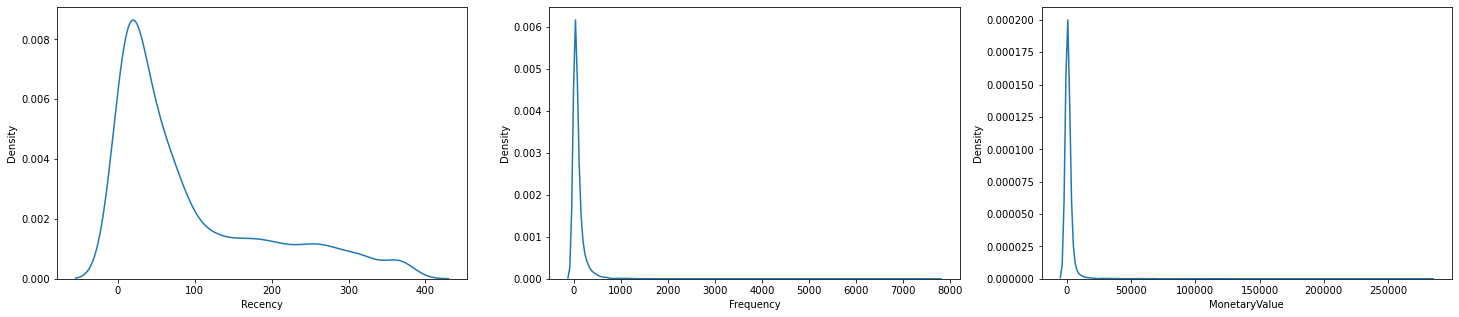

In [107]:
f,ax = plt.subplots(figsize=(25, 5))
plt.subplot(1, 3, 1); sns.kdeplot(rfm_cluster['Recency'])
plt.subplot(1, 3, 2); sns.kdeplot(rfm_cluster['Frequency'])
plt.subplot(1, 3, 3); sns.kdeplot(rfm_cluster['MonetaryValue'])

# Frequency , MonetaryValue 와 같이 그래프가 한 쪽으로 치우쳐져 있으면 머신러닝 알고리즘이 해석하기 어렵다. -> 정규분포 형태로 바꾼다.

As we can see from the plots above, the data is fairly skewed and it is generally good practice to have the mean and variance normalized before we can perform a clustering. If we didn't do so, we would have one feature dominating our model. To centralize our data we can perform a simple log transform.

위의 그림에서 알 수 있듯이 데이터가 왜곡되어 있으며 일반적으로 군집을 수행하기 전에 평균과 분산을 정규화하는 것이 좋습니다. 그렇게하지 않으면 모델을 지배하는 기능이 하나 있습니다. 데이터를 중앙 집중화하기 위해 간단한 로그 변환을 수행 할 수 있습니다.

* 방법1 ) 로그

In [108]:
rfm_cluster_log = np.log(rfm_cluster)

In [109]:
rfm_cluster_log.describe()

,Recency,Frequency,MonetaryValue
count,4338.000000,4338.000000,4338.000000
mean,3.768762,3.671429,6.583176
std,1.431498,1.321051,1.261833
min,0.000000,0.000000,1.064711
25%,2.890372,2.833213,5.725063
50%,3.931826,3.713572,6.505029
75%,4.961090,4.584967,7.414050
max,5.924256,8.945854,12.543280


<AxesSubplot:xlabel='MonetaryValue', ylabel='Density'>

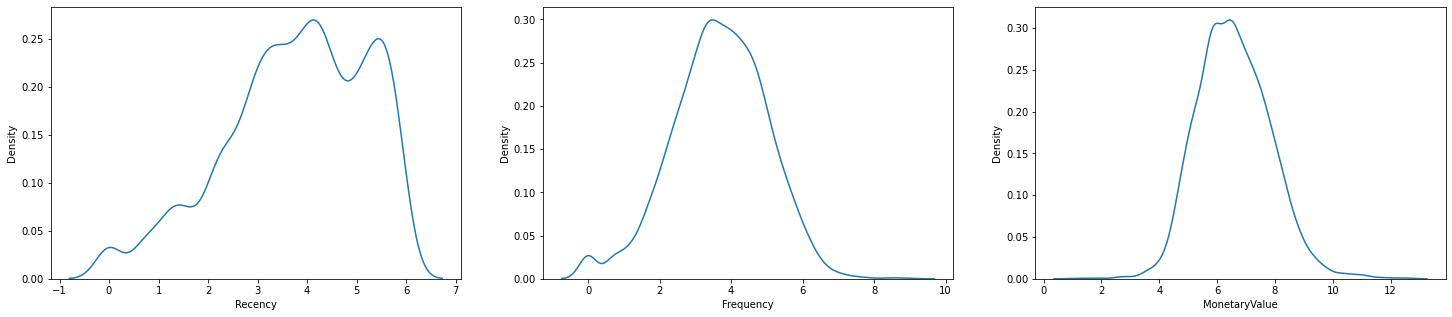

In [111]:
# 위에서 로그변환한 데이터를 distplot 으로 그려봅니다.
f,ax = plt.subplots(figsize=(25, 5))
plt.subplot(1, 3, 1); sns.kdeplot(rfm_cluster_log['Recency'])
plt.subplot(1, 3, 2); sns.kdeplot(rfm_cluster_log['Frequency'])
plt.subplot(1, 3, 3); sns.kdeplot(rfm_cluster_log['MonetaryValue'])

* 방법2 ) sklearn에서 제공하는 Scaler 사용
    * StandardScaler : 평균을 0으로 만들고, 데이터를 단위 분사에 맞게 조정하여 표준 정규 분포를 따르게 스케일링

In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
scaler = StandardScaler()

In [114]:
scaler.fit(rfm_cluster_log)

StandardScaler()

In [115]:
rfm_norm = scaler.fit_transform(rfm_cluster_log)

In [117]:
rfm_norm = pd.DataFrame(data=rfm_norm, index=rfm_cluster_log.index, columns=rfm_cluster_log.columns)
rfm_norm

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,1.409969,-2.779493,3.702000
12347.0,-2.148777,1.160254,1.415182
12348.0,0.383367,-0.179758,0.721916
12349.0,-0.575913,0.468644,0.704216
12350.0,1.374810,-0.634580,-0.610958
...,...,...,...
18280.0,1.298691,-1.036297,-1.099235
18281.0,0.998884,-1.306322,-1.736525
18282.0,-1.180243,-0.898269,-1.110506


In [141]:
rfm_norm.describe()

,Recency,Frequency,MonetaryValue
count,4.338000e+03,4.338000e+03,4.338000e+03
mean,-3.135241e-16,6.395683e-17,4.215418e-16
std,1.000115e+00,1.000115e+00,1.000115e+00
min,-2.633044e+00,-2.779493e+00,-4.373877e+00
25%,-6.136869e-01,-6.345797e-01,-6.801311e-01
50%,1.139244e-01,3.190506e-02,-6.193819e-02
75%,8.330196e-01,6.916040e-01,6.585423e-01
max,1.505935e+00,3.993059e+00,4.723916e+00


<AxesSubplot:xlabel='MonetaryValue', ylabel='Density'>

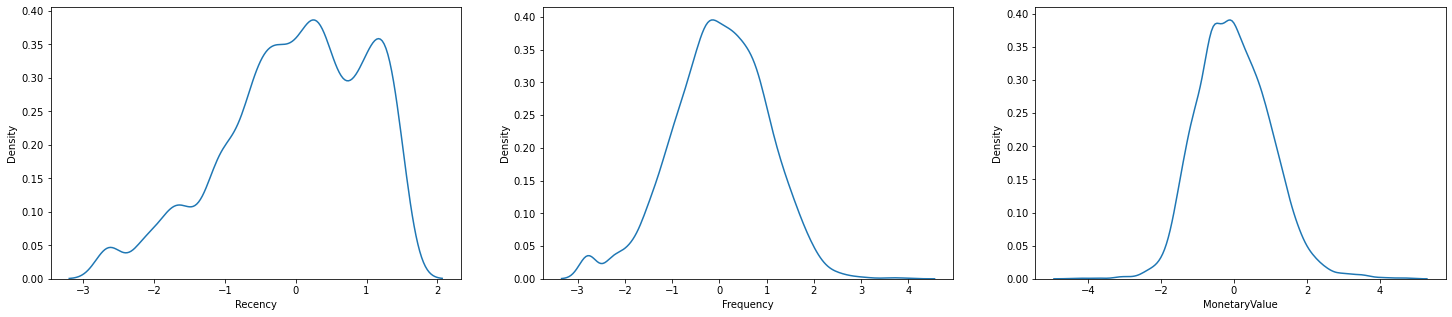

In [119]:
f,ax = plt.subplots(figsize=(25, 5))
plt.subplot(1, 3, 1); sns.kdeplot(rfm_norm['Recency'])
plt.subplot(1, 3, 2); sns.kdeplot(rfm_norm['Frequency'])
plt.subplot(1, 3, 3); sns.kdeplot(rfm_norm['MonetaryValue'])

To find out how many clusters would lead to the best division of our data, we can use the elbow method. What this does esentially, is give you a visual representation of how many clusters it takes to significantly reduce the euclidean distance between the data point and the centroid. I've decided to go with 5 clusters for this case although 3 or 4 also seem like a viable options.

데이터를 가장 잘 나눌 수있는 군집 수를 알아보기 위해 엘보우 방법을 사용할 수 있습니다. 이것이 본질적으로하는 일은 데이터 포인트와 중심 사이의 유클리드 거리를 크게 줄이는 데 얼마나 많은 클러스터가 있는지 시각적으로 보여줍니다. 3 또는 4도 실행 가능한 옵션처럼 보이지만이 경우에는 5 개의 클러스터를 사용하기로 결정했습니다.

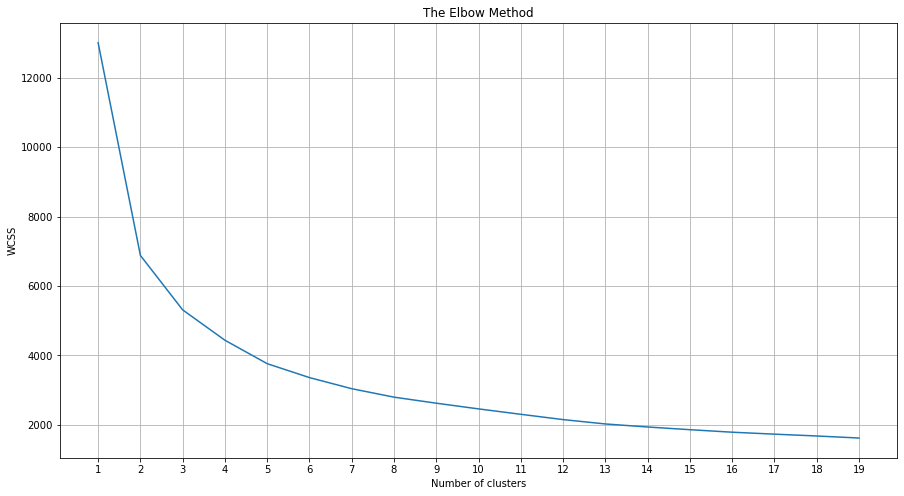

In [120]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    # rfm_norm 값을 학습하고
    kmeans.fit(rfm_norm)
    # wcss 에 inertia_ 값을 넣어 elbow 값을 봅니다.
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(15,8))
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 20))
plt.grid(True)
plt.show()

In [121]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(rfm_norm)

KMeans(n_clusters=5)

In [122]:
kmeans.cluster_centers_

array([[-0.83721704, -0.12803845, -0.27266125],
       [ 0.82059596, -0.32262984, -0.42402782],
       [-1.37988592,  1.3010721 ,  1.39987989],
       [ 0.1022728 ,  0.63563188,  0.62737139],
       [ 0.71266544, -1.49816986, -1.2467288 ]])

In [123]:
kmeans.labels_

array([3, 2, 3, ..., 0, 2, 3])

In [124]:
rfm['Cluster'] = kmeans.labels_

In [128]:
rfm.head(10)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment,Cluster
CustomerID,,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6,Middle,3
12347.0,2,182,4310.00,4,4,4,444,12,Top,2
12348.0,75,31,1797.24,2,2,4,224,8,Middle,3
12349.0,19,73,1757.55,3,3,4,334,10,Top,3
12350.0,310,17,334.40,1,1,2,112,4,Low,1
12352.0,36,85,2506.04,3,3,4,334,10,Top,3
12353.0,204,4,89.00,1,1,1,111,3,Low,4
12354.0,232,58,1079.40,1,3,3,133,7,Middle,1
12355.0,214,13,459.40,1,1,2,112,4,Low,1


In [127]:
#### Segment 로 범주화 했던 값을 그룹화 했던 것처럼 군집화 한 데이터의 값을 요약합니다.
# Recency, Frequency 의 평균값을 구하고
# MonetaryValue 는 평균과 count 값을 함께 구합니다. 

rfm.groupby(['Cluster']).agg({'Recency':'mean',
                              'Frequency':'mean',
                              'MonetaryValue': 'mean',
                             }).round(0)


# 2번 클러스터가 가장 TOP 으로 보이고, 4번 클러스터가 가장 낮은 등급으로 보인다.

,Recency,Frequency,MonetaryValue
Cluster,,,
0,17.0,41.0,641.0
1,169.0,30.0,504.0
2,9.0,315.0,8110.0
3,65.0,108.0,2042.0
4,168.0,7.0,199.0


It looks like Cluster 1,2 and 3 are performing well with 1 and 2 performing significantly better. 

클러스터 1, 2 및 3이 1 및 2의 성능이 크게 향상되는 것처럼 보입니다.


* ps. 상품불류 할때도 text 를 알고리즘으로 돌려서 분류할 수 있다.

In [133]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost,InvoiceDateCon,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,2010-12-01,2010-12-01,1


In [134]:
df_trim = df.iloc[:,[6,7,8,9,11]]

In [135]:
df_trim.head(1)

,CustomerID,Country,TotalCost,InvoiceDateCon,CohortIndex
0,17850.0,United Kingdom,15.3,2010-12-01,1


In [137]:
rfm.groupby(['Cluster']).mean()

,Recency,Frequency,MonetaryValue,RFM_Score
Cluster,,,,
0,17.405685,41.487080,640.724963,8.027132
1,168.786260,29.888889,503.937347,5.443596
2,9.174174,315.243243,8109.844700,11.615616
3,64.533724,108.055718,2041.750177,9.261975
4,168.145115,6.965517,199.438276,3.876437


In [138]:
rfm.mean()

Recency            92.583679
Frequency          90.523513
MonetaryValue    2009.852304
RFM_Segment              inf
RFM_Score           7.501153
Cluster             1.928077
dtype: float64

In [139]:
mean_clus = rfm.groupby(['Cluster']).mean() # 머신러닝으로 구한값 
pop_avg = rfm.mean() # 머신러닝으로 구하지 않은 값.
relative_imp = mean_clus / pop_avg - 1
relative_imp = relative_imp.dropna(axis=1).iloc[:,[3,0,1]]

In [140]:
relative_imp

,Recency,Frequency,MonetaryValue
Cluster,,,
0,-0.812001,-0.541698,-0.681208
1,0.823067,-0.669822,-0.749266
2,-0.900909,2.482446,3.035045
3,-0.302969,0.193676,0.015871
4,0.816142,-0.923053,-0.900770


<AxesSubplot:ylabel='Cluster'>

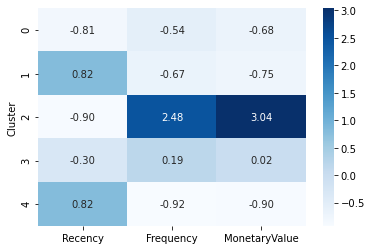

In [143]:
# 위의 값을 heatmap으로 표시합니다.
sns.heatmap(relative_imp ,annot=True, fmt='.2f', cmap='Blues')

We can now break this data set down into separate dataframe and perform further analysis on which segments seem to show up in which cluster. It would only make sense that cluster 1 and 2 (renamed 2 and 3 respectively) have big chunk of customers from the Top and Middle tier.


이제 이 데이터 세트를 별도의 데이터 프레임으로 분류하고 어떤 클러스터에 어떤 세그먼트가 나타나는지에 대한 추가 분석을 수행 할 수 있습니다. 클러스터 1과 2 (각각 2와 3으로 이름이 바))는 상위 및 미들 티어의 고객이 많습니다.

In [144]:
rfm_c1 = rfm[rfm['Cluster'] == 0]
rfm_c2 = rfm[rfm['Cluster'] == 1]
rfm_c3 = rfm[rfm['Cluster'] == 2]
rfm_c4 = rfm[rfm['Cluster'] == 3]
rfm_c5 = rfm[rfm['Cluster'] == 4]

In [145]:
# 1번 클러스터 그룹
rfm_c1.groupby(['General_Segment']).agg({'Recency': 'mean',
                                         'Frequency': 'mean',
                                         'MonetaryValue': ['mean', 'count'],
                                        }).round(0)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Low                25.0      14.0         233.0    28
Middle             19.0      36.0         553.0   595
Top                 9.0      70.0        1061.0   151

In [146]:
rfm_c2.groupby(['General_Segment']).agg({'Recency': 'mean',
                                         'Frequency': 'mean',
                                         'MonetaryValue': ['mean', 'count'],
                                        }).round(0)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Low               214.0      23.0         358.0   616
Middle            120.0      37.0         664.0   563

In [147]:
rfm_c3.groupby(['General_Segment']).agg({'Recency': 'mean',
                                         'Frequency': 'mean',
                                         'MonetaryValue': ['mean', 'count'],
                                        }).round(0)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Middle              3.0       9.0       12394.0     1
Top                 9.0     316.0        8103.0   665

In [148]:
rfm_c4.groupby(['General_Segment']).agg({'Recency': 'mean',
                                         'Frequency': 'mean',
                                         'MonetaryValue': ['mean', 'count'],
                                        }).round(0)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Middle             84.0      80.0        1755.0   576
Top                40.0     144.0        2411.0   447

In [149]:
rfm_c5.groupby(['General_Segment']).agg({'Recency': 'mean',
                                         'Frequency': 'mean',
                                         'MonetaryValue': ['mean', 'count'],
                                        }).round(0)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Low               179.0       7.0         180.0   644
Middle             37.0       5.0         435.0    52

In [156]:
df_trim.head(2)

,CustomerID,Country,TotalCost,InvoiceDateCon,CohortIndex
0,17850.0,United Kingdom,15.30,2010-12-01,1
1,17850.0,United Kingdom,20.34,2010-12-01,1


In [152]:
rfm.head(2)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment,Cluster
CustomerID,,,,,,,,,,
12346.0,326,1,77183.6,1,1,4,114,6,Middle,3
12347.0,2,182,4310.0,4,4,4,444,12,Top,2


In [153]:
rfm['CustomerID'] = rfm.index

In [154]:
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment,Cluster,CustomerID
CustomerID,,,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6,Middle,3,12346.0
12347.0,2,182,4310.00,4,4,4,444,12,Top,2,12347.0
12348.0,75,31,1797.24,2,2,4,224,8,Middle,3,12348.0
12349.0,19,73,1757.55,3,3,4,334,10,Top,3,12349.0
12350.0,310,17,334.40,1,1,2,112,4,Low,1,12350.0
...,...,...,...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,111,3,Low,4,18280.0
18281.0,181,7,80.82,1,1,1,111,3,Low,4,18281.0
18282.0,8,12,178.05,4,1,1,411,6,Middle,0,18282.0


In [158]:
rfm.reset_index(drop=True, inplace=True)

Now that we have all of our dataframes finalized, we can finally go back and make the necessary merges. This will allow us to map our CustomerIDs from our first dataframe to our clusters, rfm scores and segments. This will give us a nice and clean dataset which can then be used for further analysis and targeting by our Marketing and Sales teams.

이제 모든 데이터 프레임이 완성되었으므로 마지막으로 돌아가 필요한 병합을 수행 할 수 있습니다. 이를 통해 첫 번째 데이터 프레임에서 고객 ID를 클러스터, rfm 점수 및 세그먼트로 매핑 할 수 있습니다. 이를 통해 마케팅 및 영업 팀에서 추가 분석 및 타겟팅에 사용할 수있는 훌륭하고 깨끗한 데이터 세트를 제공 할 수 있습니다.

In [159]:
df_rework = pd.merge(df_trim, rfm, on='CustomerID')

In [160]:
df_rework.head()

,CustomerID,Country,TotalCost,InvoiceDateCon,CohortIndex,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment,Cluster
0,17850.0,United Kingdom,15.30,2010-12-01,1,372,297,5391.21,1,4,4,144,9,Middle,3
1,17850.0,United Kingdom,20.34,2010-12-01,1,372,297,5391.21,1,4,4,144,9,Middle,3
2,17850.0,United Kingdom,22.00,2010-12-01,1,372,297,5391.21,1,4,4,144,9,Middle,3
3,17850.0,United Kingdom,20.34,2010-12-01,1,372,297,5391.21,1,4,4,144,9,Middle,3
4,17850.0,United Kingdom,20.34,2010-12-01,1,372,297,5391.21,1,4,4,144,9,Middle,3


In [161]:
df_rework.describe()

,CustomerID,TotalCost,CohortIndex,Recency,Frequency,MonetaryValue,RFM_Score,Cluster
count,392691.000000,392691.000000,392691.000000,392691.000000,392691.000000,392691.000000,392691.000000,392691.000000
mean,15287.840916,22.202544,5.147592,41.114057,652.164447,11564.495722,10.274539,2.052907
std,1713.540734,156.608909,3.850200,65.403960,1421.138766,31428.874857,2.152055,0.863079
min,12346.000000,0.001000,1.000000,1.000000,1.000000,2.900000,3.000000,0.000000
25%,13955.000000,4.950000,1.000000,4.000000,89.000000,1097.620000,9.000000,2.000000
50%,15150.000000,12.450000,4.000000,17.000000,197.000000,2662.060000,11.000000,2.000000
75%,16791.000000,19.800000,8.000000,43.000000,441.000000,6287.770000,12.000000,3.000000
max,18287.000000,77183.600000,13.000000,374.000000,7676.000000,280206.020000,12.000000,4.000000


덧붙여 아래 노트북도 분석이 잘 되어 있습니다.

https://www.kaggle.com/fabiendaniel/customer-segmentation